In [4]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import nltk

In [8]:
#importing the data
amazon_reviews = pd.read_excel(r'/Users/ashish/Documents/Amzon_review_csv.xlsm')
amazon_reviews.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,528881469,"[0, 0]",5,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1370131200
1,1,528881469,"[12, 15]",1,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1290643200
2,2,528881469,"[43, 45]",3,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1283990400
3,3,528881469,"[9, 10]",2,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1290556800
4,4,528881469,"[0, 0]",1,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1317254400


In [9]:
amazon_reviews.shape

(999, 10)

In [10]:
#Creating dataset
reviews = pd.DataFrame()
reviews['reviewText'] = amazon_reviews['reviewText']
reviews['overall'] = amazon_reviews['overall']
reviews.head()

,reviewText,overall
0,We got this GPS for my husband who is an (OTR)...,5
1,"I'm a professional OTR truck driver, and I bou...",1
2,"Well, what can I say. I've had this unit in m...",3
3,"Not going to write a long review, even thought...",2
4,I've had mine for a year and here's what we go...,1


In [11]:
#Checking missing values
reviews.isnull().sum()

reviewText    2
overall       0
dtype: int64

In [12]:
# We observe that there are 2 missing values present in our dataset.
reviews = reviews[reviews['reviewText'].notnull()]
reviews.head()

,reviewText,overall
0,We got this GPS for my husband who is an (OTR)...,5
1,"I'm a professional OTR truck driver, and I bou...",1
2,"Well, what can I say. I've had this unit in m...",3
3,"Not going to write a long review, even thought...",2
4,I've had mine for a year and here's what we go...,1


In [13]:
reviews.shape

(997, 2)

In [14]:
#Combining all the reviews into string so the to perform NLP techniques
combined_reviews = " ".join(reviews['reviewText'])
print(combined_reviews[:500])

We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting ad


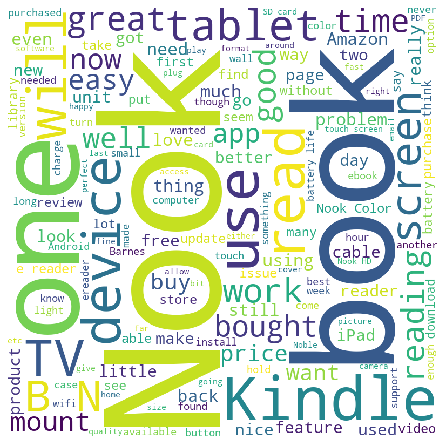

In [15]:
# Creating wordcloud
from wordcloud import WordCloud
word_cloud = WordCloud(width = 800, height = 800, background_color = 'white', max_words = 150).generate(combined_reviews)
plt.figure(figsize = (12,6))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [16]:
# Find frequency of each word
list1 = []
for i in combined_reviews.split():
    list1.append(i)
dictionary1 = {}
for j in list1:
    dictionary1[j] = dictionary1.get(j,0)+1
series1 = pd.Series(dictionary1)
word_freq = pd.DataFrame(series1)
word_freq = word_freq.reset_index().rename(columns = {'index':'Words', 0:'Frequency'})
word_freq.head()

,Words,Frequency
0,We,51
1,got,147
2,this,1168
3,GPS,14
4,for,2000


In [17]:
#Checking top 25 maximum frequency words
top_25_words = word_freq.sort_values(ascending = False, by = 'Frequency')
top_25_words.head(25)

,Words,Frequency
12,the,7016
81,to,4356
90,and,4066
22,a,3819
93,I,3782
8,is,2403
20,it,2341
4,for,2000
30,of,1945
41,that,1444


In [18]:
#Applying Tokenization
from nltk.tokenize import word_tokenize
all_words = word_tokenize(combined_reviews.lower())
print(all_words[:500])

['we', 'got', 'this', 'gps', 'for', 'my', 'husband', 'who', 'is', 'an', '(', 'otr', ')', 'over', 'the', 'road', 'trucker', '.', 'very', 'impressed', 'with', 'the', 'shipping', 'time', ',', 'it', 'arrived', 'a', 'few', 'days', 'earlier', 'than', 'expected', '...', 'within', 'a', 'week', 'of', 'use', 'however', 'it', 'started', 'freezing', 'up', '...', 'could', 'of', 'just', 'been', 'a', 'glitch', 'in', 'that', 'unit', '.', 'worked', 'great', 'when', 'it', 'worked', '!', 'will', 'work', 'great', 'for', 'the', 'normal', 'person', 'as', 'well', 'but', 'does', 'have', 'the', '``', 'trucker', "''", 'option', '.', '(', 'the', 'big', 'truck', 'routes', '-', 'tells', 'you', 'when', 'a', 'scale', 'is', 'coming', 'up', 'ect', '...', ')', 'love', 'the', 'bigger', 'screen', ',', 'the', 'ease', 'of', 'use', ',', 'the', 'ease', 'of', 'putting', 'addresses', 'into', 'memory', '.', 'nothing', 'really', 'bad', 'to', 'say', 'about', 'the', 'unit', 'with', 'the', 'exception', 'of', 'it', 'freezing', 'whic

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/ashish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
import nltk

In [21]:
from nltk.probability import FreqDist
fdist = FreqDist(all_words)
fdist

FreqDist({'the': 7859, '.': 6669, ',': 5824, 'i': 4499, 'to': 4419, 'and': 4213, 'a': 3902, 'it': 3657, 'is': 2498, 'for': 2098, ...})

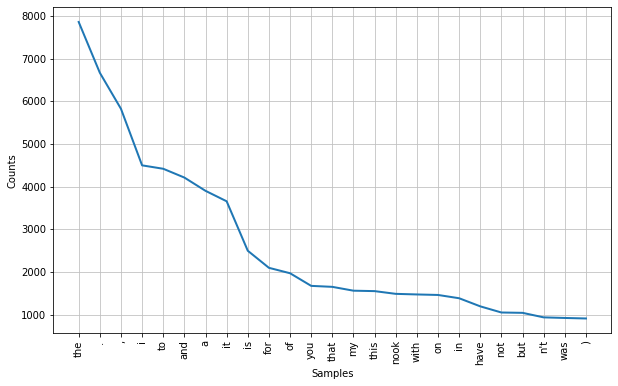

In [22]:
# Ploting frequency distribution
plt.figure(figsize = (10,6))
fdist.plot(25, cumulative = False)
plt.show()

In [23]:
# Checking stopwords and punctuations
from nltk.corpus import stopwords
from string import punctuation
stop_words = stopwords.words('english')
print(stop_words)
print(list(punctuation))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
stop_words_updated = stop_words + ['..', '...', 'will', 'would', 'can', 'could', "n't"]
print(stop_words_updated)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
# Removing stopwords and punctuations
all_words_updated = [word for word in all_words if word not in stop_words_updated\
                  and word not in list(punctuation) and len(word) > 2]
print(all_words_updated[:200])

['got', 'gps', 'husband', 'otr', 'road', 'trucker', 'impressed', 'shipping', 'time', 'arrived', 'days', 'earlier', 'expected', 'within', 'week', 'use', 'however', 'started', 'freezing', 'glitch', 'unit', 'worked', 'great', 'worked', 'work', 'great', 'normal', 'person', 'well', 'trucker', 'option', 'big', 'truck', 'routes', 'tells', 'scale', 'coming', 'ect', 'love', 'bigger', 'screen', 'ease', 'use', 'ease', 'putting', 'addresses', 'memory', 'nothing', 'really', 'bad', 'say', 'unit', 'exception', 'freezing', 'probably', 'one', 'million', 'luck', 'contacted', 'seller', 'within', 'minutes', 'email', 'received', 'email', 'back', 'instructions', 'exchange', 'impressed', 'way', 'around', 'professional', 'otr', 'truck', 'driver', 'bought', 'tnd', '700', 'truck', 'stop', 'hoping', 'make', 'life', 'easier', 'rand', 'mcnally', 'listening', 'first', 'thing', 'charging', 'connect', 'laptop', 'install', 'software', 'attempt', 'update', 'software', 'detected', 'problem', 'update', 'wanted', 'home', 

In [26]:
# Applying lemmatization
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
lemma_words = [lemma.lemmatize(i) for i in all_words_updated]
print(len(set(lemma_words)))

8971


In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/ashish/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
# Create new dataframe after Text Cleaning
def clean_text(text):
    token = word_tokenize(text.lower())
    lemm = [lemma.lemmatize(i) for i in token if i not in stop_words_updated\
           and i not in list(punctuation) and len(i) > 2]
    sentence = ' '.join(lemm)
    return sentence

reviews['clean_reviewText'] = reviews['reviewText'].apply(clean_text)
reviews.head()

,reviewText,overall,clean_reviewText
0,We got this GPS for my husband who is an (OTR)...,5,got gps husband otr road trucker impressed shi...
1,"I'm a professional OTR truck driver, and I bou...",1,professional otr truck driver bought tnd 700 t...
2,"Well, what can I say. I've had this unit in m...",3,well say 've unit truck four day prior garmin ...
3,"Not going to write a long review, even thought...",2,going write long review even thought unit dese...
4,I've had mine for a year and here's what we go...,1,'ve mine year got try route non truck route te...


In [ ]:
#Plot a bigram bar graph on the top words 25 words

In [29]:
# Plot a bigram bar graph on top 25 words
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(ngram_range = (2,2))
bigrams = count_vect.fit_transform(reviews['clean_reviewText'])
print(count_vect.get_feature_names()[:200])

['00 100', '00 300', '00 believe', '00 best', '00 came', '00 dollar', '00 free', '00 great', '00 hit', '00 hold', '00 idea', '00 ipad', '00 like', '00 one', '00 opinion', '00 pleased', '00 price', '00 product', '00 shipped', '00 tablet', '00 thing', '00 title', '00 unless', '00 worth', '000 000', '000 android', '000 apps', '000 book', '000 free', '000 picture', '000 recipe', '000 repeated', '000 rig', '000 title', '000 yes', '01 31', '02 08', '02 wish', '04 14', '08 2010', '09i wanted', '0v 900mah', '0v battery', '10 12', '10 14', '10 15', '10 2013', '10 2014', '10 android', '10 big', '10 built', '10 hour', '10 offering', '10 pdf', '10 second', '10 software', '10 touch', '10 update', '10 using', '100 00', '100 1usgets', '100 250', '100 250v', '100 32gb', '100 battery', '100 book', '100 buck', '100 capable', '100 category', '100 charge', '100 come', '100 dollar', '100 external', '100 full', '100 glad', '100 kindle', '100 luxeon', '100 memory', '100 overall', '100 page', '100 percent', '

In [30]:
# Converting to Document term matrix
DTM = pd.DataFrame(bigrams.toarray(), columns = count_vect.get_feature_names())
DTM.head()

,00 100,00 300,00 believe,00 best,00 came,00 dollar,00 free,00 great,00 hit,00 hold,...,zoom touch,zoom type,zoom update,zoom use,zooming awkward,zooming feature,zooming scrolling,zs15 photo,zune place,zune ve
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
top_25_bigrams = DTM.sum().sort_values(ascending = False).head(25)
top_25_bigrams

barnes noble        166
nook color          135
battery life         98
touch screen         96
nook tablet          66
work great           65
kindle fire          61
work well            59
read book            56
wall mount           53
wi fi                47
simple touch         45
android tablet       41
customer service     41
original nook        38
the nook             38
nook simple          37
nook kindle          36
work fine            35
page turn            34
easy install         34
much better          33
google play          33
kindle nook          33
buy book             32
dtype: int64

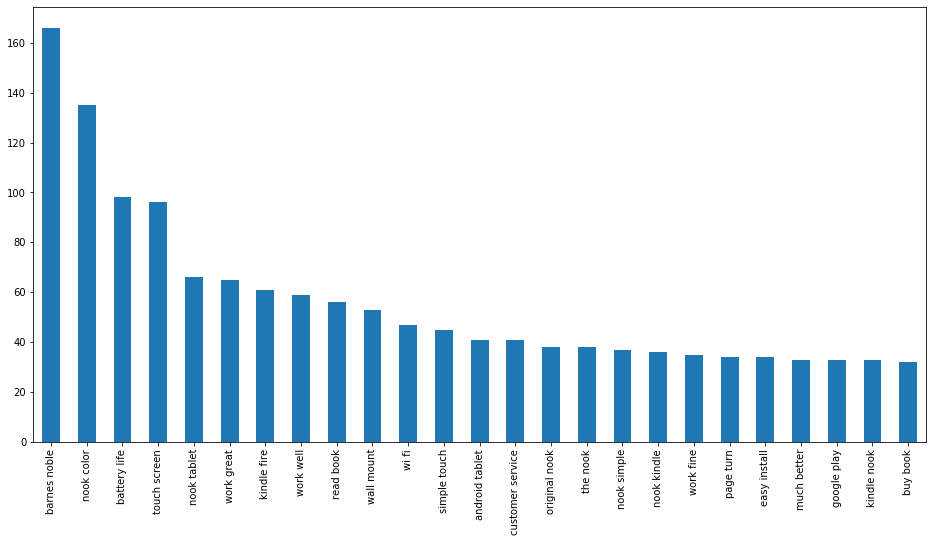

In [32]:
top_25_bigrams.plot(kind = 'bar', figsize = (16,8))
plt.show()

In [33]:
#Find customer concern areas - the top 25 bigrams which includes the below negative words indicating the customer concern areas
# 'poor', 'waste', 'bad', 'defective', 'disgusting', 'untrusty', 'worst', 'horrible', 'unexpectedly', 'slow'



In [34]:
bigrams = DTM.columns
print(bigrams)

Index(['00 100', '00 300', '00 believe', '00 best', '00 came', '00 dollar',
       '00 free', '00 great', '00 hit', '00 hold',
       ...
       'zoom touch', 'zoom type', 'zoom update', 'zoom use', 'zooming awkward',
       'zooming feature', 'zooming scrolling', 'zs15 photo', 'zune place',
       'zune ve'],
      dtype='object', length=55072)


In [35]:
negative_words = ['poor', 'waste', 'bad', 'defective', 
                  'disgusting', 'untrusty', 'worst', 
                  'horrible', 'unexpectedly', 'slow']

In [36]:
negative_bigrams = []
for i in bigrams:
    words = i.split()
    if sum(np.in1d(words, negative_words)) >= 1:
        negative_bigrams.append(i)

In [37]:
DTM_subset = DTM[negative_bigrams]
top_25_cutomer_concern_areas = DTM_subset.sum().sort_values(ascending = False).head(25)
top_25_cutomer_concern_areas

waste money                 6
the bad                     4
slow respond                4
bad review                  4
defective nook              3
bad say                     3
poor contrast               3
bad thing                   3
bad really                  3
little slow                 3
bad experience              2
defective product           2
excruciatingly slow         2
slow clunky                 2
not bad                     2
nothing bad                 2
bad unit                    2
bad nook                    2
device defective            2
poor customer               2
poor battery                2
poor quality                2
overall bad                 2
going bad                   2
responsibility defective    2
dtype: int64

In [38]:
#Plot a bar graph for the top 25 customer concern areas

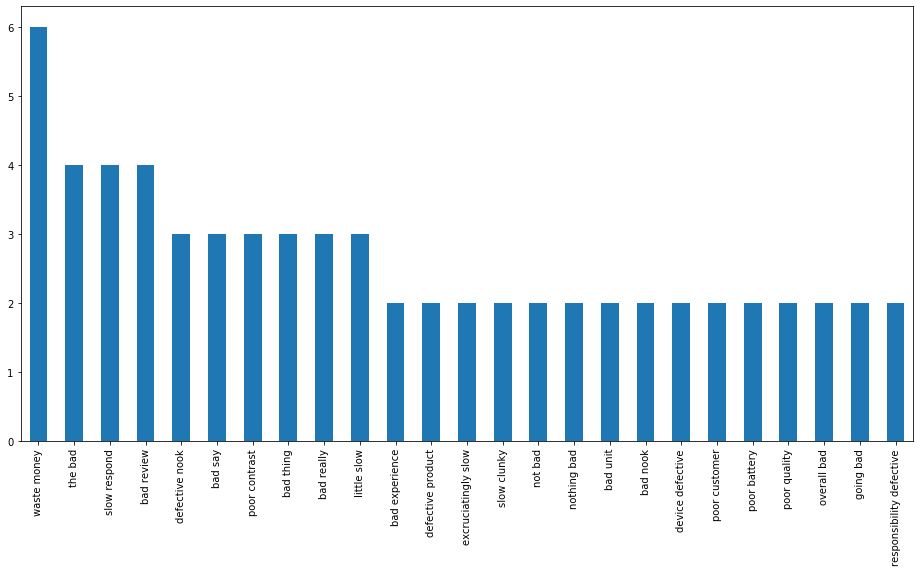

In [39]:
top_25_cutomer_concern_areas.plot(kind = 'bar', figsize = (16,8))

In [ ]:
#Thank You